## Vegetable Classification Using Deep Convolutional Neural Networks

by: Jorge Abrego

Source: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/

### Loading Modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from PIL import Image
import os

### Importing Data

In this project, Plant_leaf_diseases_dataset_without_augmentation folder will be used, in order to make other kind of data augmentation techniques. This dataset could be downloaded [here](https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip).

In [2]:
cur_dir = os.getcwd()
par_dir = os.path.abspath(os.path.join(cur_dir, os.pardir))
data_dir = str(pathlib.Path(par_dir + "/data").with_suffix(''))
#folders = list(f.name for f in os.scandir(data_dir) if not f.name.startswith('.'))

Loading train folder

In [3]:
train_dir = pathlib.Path(data_dir + "/train")
image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

15000

Loading validation folder

In [4]:
validation_dir = pathlib.Path(data_dir + "/validation")
image_count = len(list(validation_dir.glob('*/*.jpg')))
image_count

3000

Loading test folder

In [5]:
test_dir = pathlib.Path(data_dir + "/test")
image_count = len(list(test_dir.glob('*/*.jpg')))
image_count

3000

Displaying some images

0026.jpg  -  (224, 224)


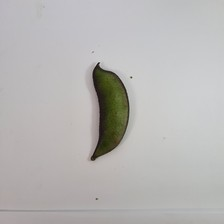

0028.jpg  -  (224, 224)


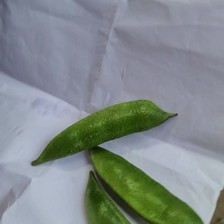

0029.jpg  -  (224, 224)


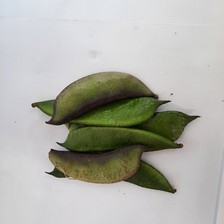

0001.jpg  -  (224, 224)


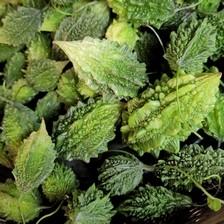

0002.jpg  -  (224, 224)


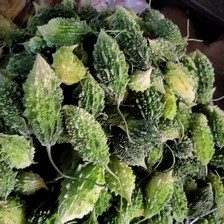

0003.jpg  -  (224, 224)


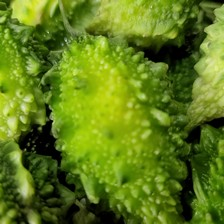

0001.jpg  -  (224, 224)


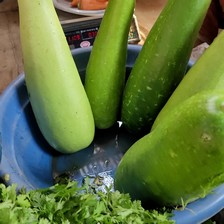

0002.jpg  -  (224, 224)


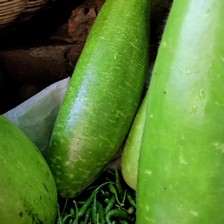

0003.jpg  -  (224, 224)


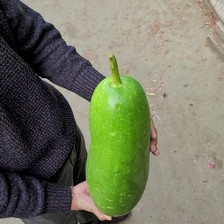

In [6]:
for dir in os.listdir(train_dir)[:3]:
    obj_dir = pathlib.Path(str(train_dir)+"/"+dir)
    for img in os.listdir(obj_dir)[:3]:
        image = Image.open(pathlib.Path(str(obj_dir)+"/"+img))
        print(img,' - ',image.size)
        display(image)

### EDA

Creating a dataframe to analyze the content of the images

In [7]:
column_names = ["file", "type", "dataset", "classification", 'color_mode', 'channels', "height", "width"]
df_vegetables = pd.DataFrame(columns = column_names)

Loading image contents into dataframe

In [8]:
dir_lst = [("train", train_dir), ("validation", validation_dir), ("test", test_dir)]

for dataset, folder in dir_lst:
    for dir in os.listdir(folder):
        obj_dir = pathlib.Path(str(folder)+"/"+dir)
        for img in os.listdir(obj_dir):
            image = Image.open(pathlib.Path(str(obj_dir)+"/"+img))
            file_name, extension = os.path.splitext(pathlib.Path(str(obj_dir)+"/"+img))
            row = [img,
                   extension[1:],
                   dataset,
                   dir,
                   image.mode,
                   len(image.getbands()),
                   image.size[0],
                   image.size[1]
                   ]
            # print(row)
            df_vegetables.loc[len(df_vegetables)] = row

In [9]:
df_vegetables.sample(10)

file type     dataset classification color_mode  channels  height  \
4365   0366.jpg  jpg       train       Broccoli        RGB         3     224   
8512   0541.jpg  jpg       train    Cauliflower        RGB         3     224   
7424   0425.jpg  jpg       train         Carrot        RGB         3     224   
13016  0017.jpg  jpg       train         Radish        RGB         3     224   
13843  0844.jpg  jpg       train         Radish        RGB         3     224   
16679  1335.jpg  jpg  validation    Cauliflower        RGB         3     224   
9593   0594.jpg  jpg       train       Cucumber        RGB         3     224   
16667  1323.jpg  jpg  validation    Cauliflower        RGB         3     224   
9941   0942.jpg  jpg       train       Cucumber        RGB         3     224   
8958   1005.jpg  jpg       train    Cauliflower        RGB         3     224   

       width  
4365     224  
8512     224  
7424     224  
13016    224  
13843    224  
16679    224  
9593     224  
16667    224  
9941     224  
8958     224

#### Getting information about images

Filetype distribution

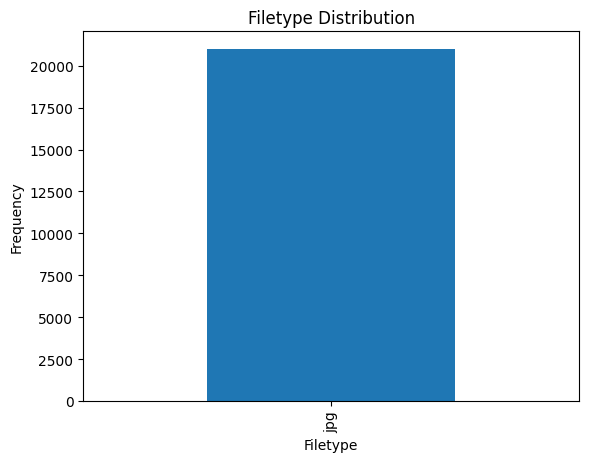

In [10]:
df_vegetables['type'].value_counts().plot(kind='bar')
plt.title('Filetype Distribution')
plt.xlabel('Filetype')
plt.ylabel('Frequency')
plt.show()

Class Frequency Distribution

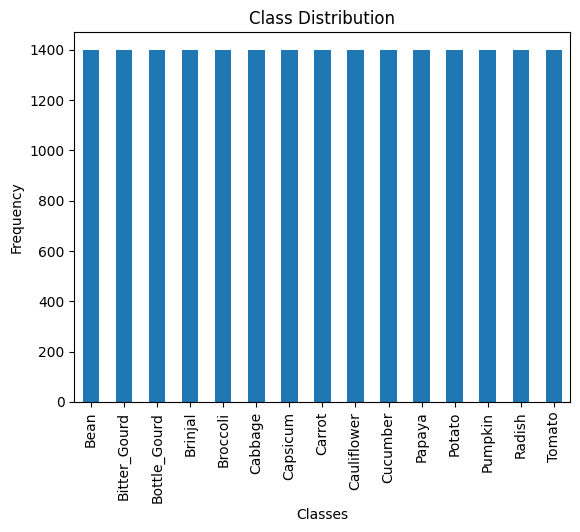

In [11]:
df_vegetables['classification'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

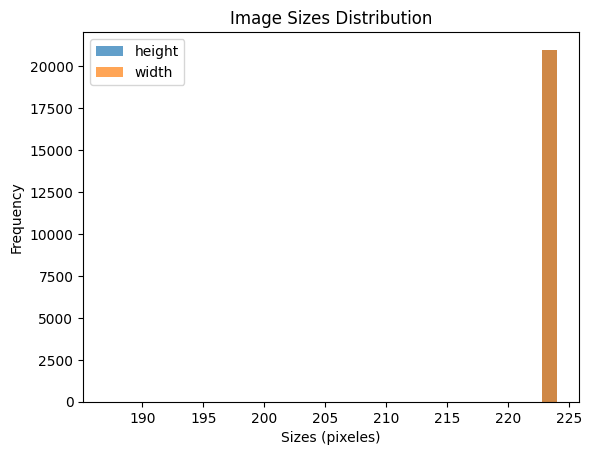

In [12]:
df_vegetables[['height', 'width']].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Image Sizes Distribution')
plt.xlabel('Sizes (pixeles)')
plt.show()

#### General Descriptive Analysis

In [13]:
print("General Descriptive Statistics:")
print(df_vegetables.describe())

General Descriptive Statistics:
       channels   height         width
count   21000.0  21000.0  21000.000000
mean        3.0    224.0    223.991333
std         0.0      0.0      0.467854
min         3.0    224.0    187.000000
25%         3.0    224.0    224.000000
50%         3.0    224.0    224.000000
75%         3.0    224.0    224.000000
max         3.0    224.0    224.000000


Summary

In [14]:
df_vegetables.groupby(["type", "classification", 'color_mode', 'channels'])[["height", "width"]].agg(['count','min', 'max'])

height           width          
                                         count  min  max count  min  max
type classification color_mode channels                                 
jpg  Bean           RGB        3          1400  224  224  1400  224  224
     Bitter_Gourd   RGB        3          1400  224  224  1400  193  224
     Bottle_Gourd   RGB        3          1400  224  224  1400  224  224
     Brinjal        RGB        3          1400  224  224  1400  224  224
     Broccoli       RGB        3          1400  224  224  1400  224  224
     Cabbage        RGB        3          1400  224  224  1400  224  224
     Capsicum       RGB        3          1400  224  224  1400  224  224
     Carrot         RGB        3          1400  224  224  1400  224  224
     Cauliflower    RGB        3          1400  224  224  1400  224  224
     Cucumber       RGB        3          1400  224  224  1400  224  224
     Papaya         RGB        3          1400  224  224  1400  187  224
     Potato         RGB        3          1400  224  224  1400  224  224
     Pumpkin        RGB        3          1400  224  224  1400  224  224
     Radish         RGB        3          1400  224  224  1400  224  224
     Tomato         RGB        3          1400  224  224  1400  224  224

### Images Preprocesing

In [15]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from IPython.display import HTML

In [16]:
SEED = 11
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=10

Loading train dataset

In [17]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=SEED,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 15000 files belonging to 15 classes.


Loading validation dataset

In [18]:
val_data = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    seed=SEED,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 3000 files belonging to 15 classes.


Loading test dataset

In [19]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=SEED,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 3000 files belonging to 15 classes.


In [20]:
class_names = train_data.class_names
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [21]:
num_classes = len(class_names)
num_classes

15

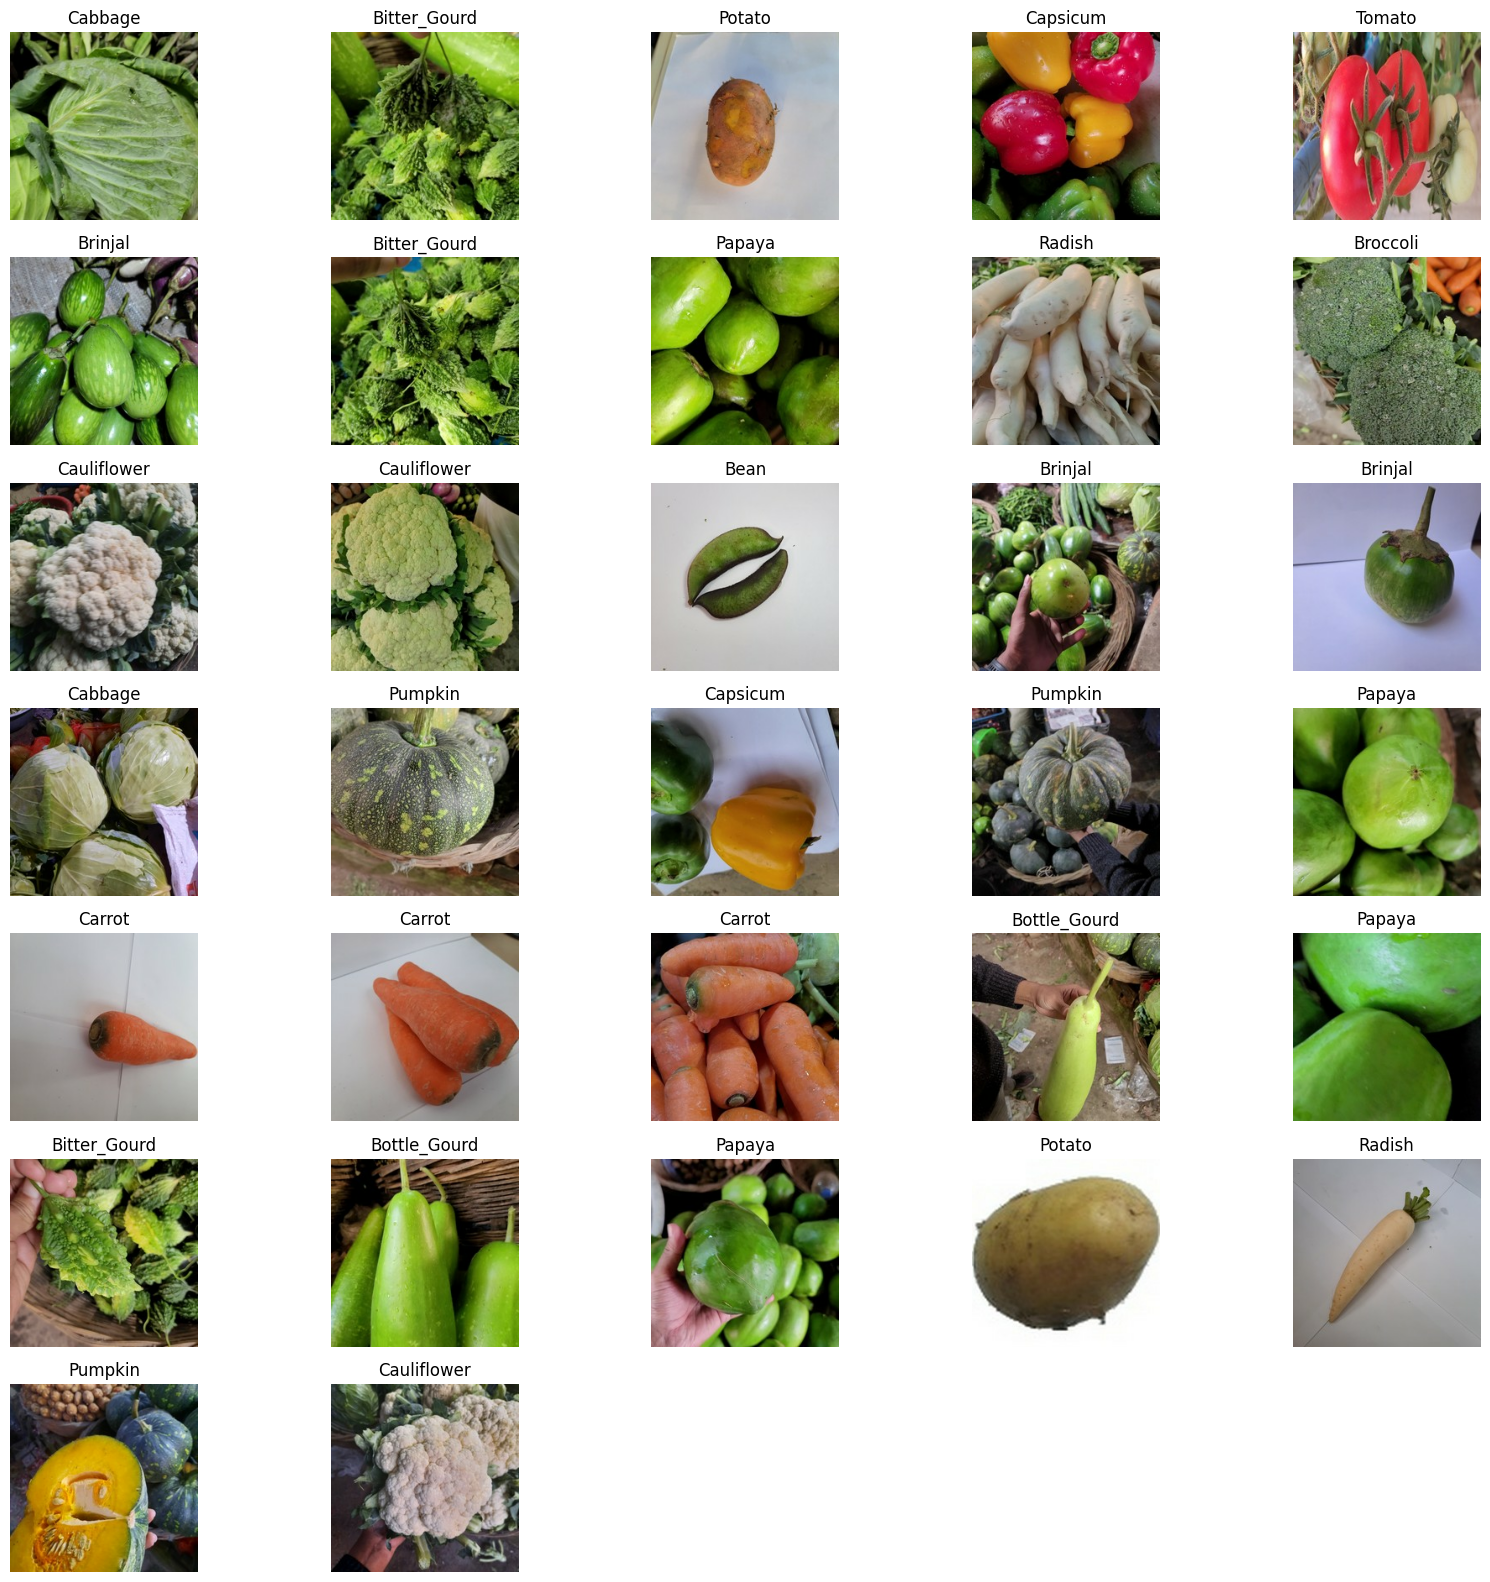

In [22]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in train_data.take(1):
    for i in range(32):
        ax = plt.subplot(7, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [24]:
train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

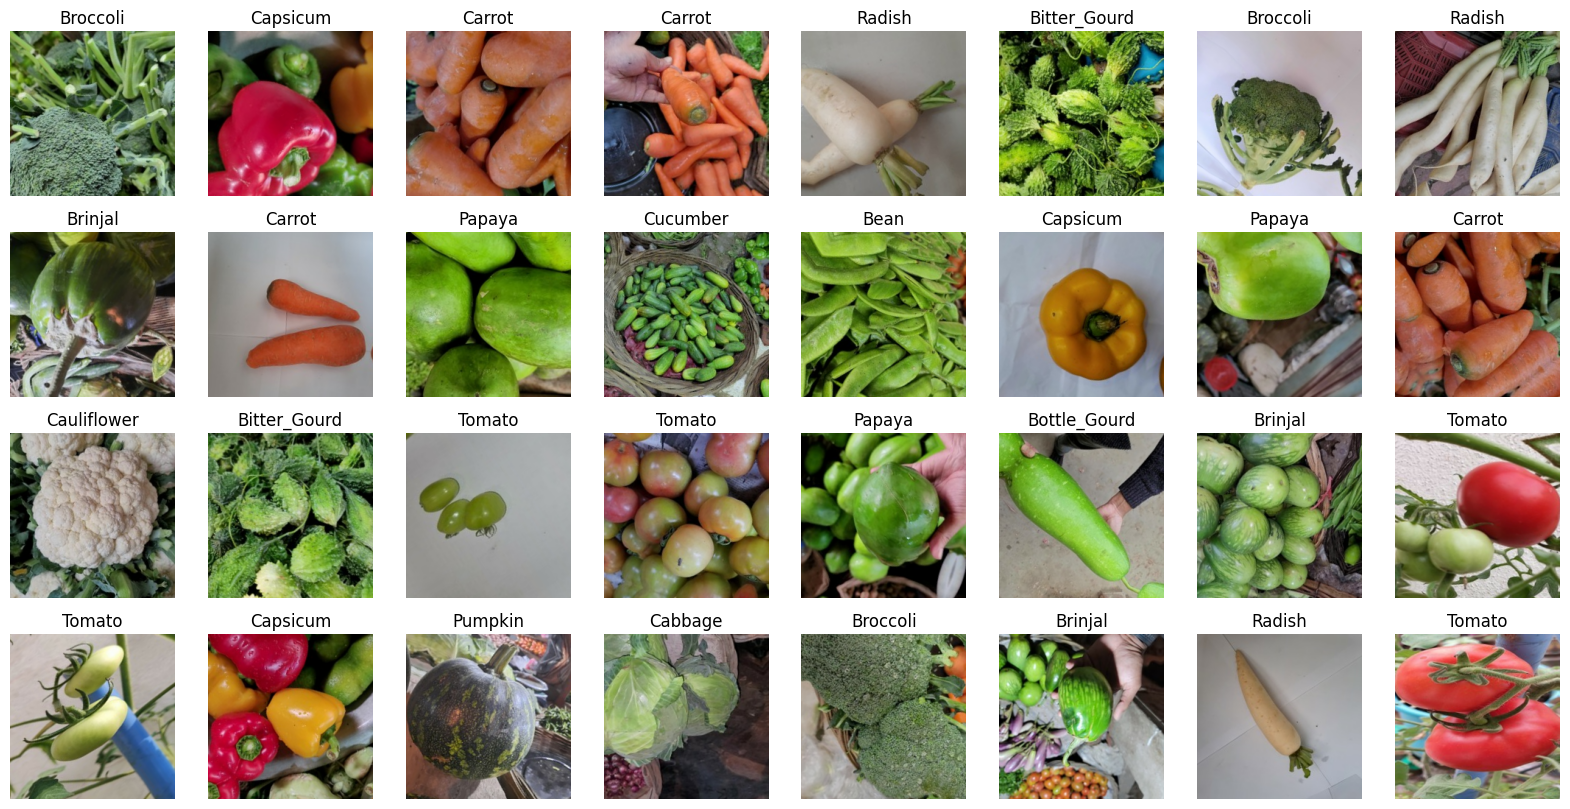

In [25]:
plt.figure(figsize=(20, 10))
for image_batch, labels_batch in train_data.take(3):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

#### Creating and applying a normalization layer

In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x, training=True), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x, training=False), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x, training=False), y))


### Model Training

Defining architectures

In [27]:
model_1 = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model_2 = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model_3 = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model_4 = models.Sequential([
    layers.Conv2D(16, kernel_size = (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

In [28]:
model_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Setting early stopping

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

Training models

In [30]:
tensorboardModel_1 = TensorBoard(log_dir='logs/model_1')
model_checkpoint_1 = ModelCheckpoint(
    'models/best_model_1_{epoch:02d}_{val_accuracy:.3f}.h5', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

history_m1 = model_1.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[tensorboardModel_1, model_checkpoint_1, early_stopping],
)

Epoch 1/10
469/469 [==============================] - 96s 197ms/step - loss: 1.2036 - accuracy: 0.5936 - val_loss: 0.8026 - val_accuracy: 0.7243
Epoch 2/10
469/469 [==============================] - 96s 205ms/step - loss: 0.6092 - accuracy: 0.7952 - val_loss: 0.6821 - val_accuracy: 0.7687
Epoch 3/10
469/469 [==============================] - 96s 205ms/step - loss: 0.4057 - accuracy: 0.8676 - val_loss: 0.3765 - val_accuracy: 0.8687
Epoch 4/10
469/469 [==============================] - 94s 200ms/step - loss: 0.3143 - accuracy: 0.8984 - val_loss: 0.3699 - val_accuracy: 0.8807
Epoch 5/10
469/469 [==============================] - 93s 198ms/step - loss: 0.2809 - accuracy: 0.9112 - val_loss: 0.2497 - val_accuracy: 0.9220
Epoch 6/10
469/469 [==============================] - 91s 194ms/step - loss: 0.2256 - accuracy: 0.9299 - val_loss: 0.5580 - val_accuracy: 0.8303
Epoch 7/10
469/469 [==============================] - 92s 195ms/step - loss: 0.2270 - accuracy: 0.9273 - val_loss: 0.1733 - val_ac

In [31]:
tensorboardModel_2 = TensorBoard(log_dir='logs/model_2')
model_checkpoint_2 = ModelCheckpoint(
    'models/best_model_2_{epoch:02d}_{val_accuracy:.3f}.h5', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

history_m2 = model_2.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[tensorboardModel_2, model_checkpoint_2, early_stopping],
)

Epoch 1/10
469/469 [==============================] - 102s 214ms/step - loss: 1.4241 - accuracy: 0.5070 - val_loss: 0.9037 - val_accuracy: 0.6937
Epoch 2/10
469/469 [==============================] - 102s 216ms/step - loss: 0.6763 - accuracy: 0.7762 - val_loss: 0.7345 - val_accuracy: 0.7813
Epoch 3/10
469/469 [==============================] - 101s 216ms/step - loss: 0.4744 - accuracy: 0.8445 - val_loss: 0.5637 - val_accuracy: 0.8097
Epoch 4/10
469/469 [==============================] - 102s 217ms/step - loss: 0.3412 - accuracy: 0.8901 - val_loss: 0.2526 - val_accuracy: 0.9187
Epoch 5/10
469/469 [==============================] - 102s 218ms/step - loss: 0.2870 - accuracy: 0.9074 - val_loss: 0.2921 - val_accuracy: 0.9010
Epoch 6/10
469/469 [==============================] - 103s 220ms/step - loss: 0.2359 - accuracy: 0.9231 - val_loss: 0.2035 - val_accuracy: 0.9333
Epoch 7/10
469/469 [==============================] - 103s 219ms/step - loss: 0.2111 - accuracy: 0.9335 - val_loss: 0.2501 -

In [32]:
tensorboardModel_3 = TensorBoard(log_dir='logs/model_3')
model_checkpoint_3 = ModelCheckpoint(
    'models/best_model_3_{epoch:02d}_{val_accuracy:.3f}.h5', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

history_m3 = model_3.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[tensorboardModel_3, model_checkpoint_3, early_stopping],
)

Epoch 1/10
469/469 [==============================] - 98s 207ms/step - loss: 1.4612 - accuracy: 0.4929 - val_loss: 0.9347 - val_accuracy: 0.6653
Epoch 2/10
469/469 [==============================] - 94s 201ms/step - loss: 0.6843 - accuracy: 0.7727 - val_loss: 0.5554 - val_accuracy: 0.8177
Epoch 3/10
469/469 [==============================] - 93s 197ms/step - loss: 0.4240 - accuracy: 0.8605 - val_loss: 0.2615 - val_accuracy: 0.9170
Epoch 4/10
469/469 [==============================] - 92s 196ms/step - loss: 0.3097 - accuracy: 0.8993 - val_loss: 0.2896 - val_accuracy: 0.9103
Epoch 5/10
469/469 [==============================] - 92s 197ms/step - loss: 0.2454 - accuracy: 0.9218 - val_loss: 0.1727 - val_accuracy: 0.9460
Epoch 6/10
469/469 [==============================] - 93s 198ms/step - loss: 0.2008 - accuracy: 0.9347 - val_loss: 0.1436 - val_accuracy: 0.9523
Epoch 7/10
469/469 [==============================] - 92s 197ms/step - loss: 0.1763 - accuracy: 0.9455 - val_loss: 0.1462 - val_ac

In [33]:
tensorboardModel_4 = TensorBoard(log_dir='logs/model_4')
model_checkpoint_4 = ModelCheckpoint(
    'models/best_model_4_{epoch:02d}_{val_accuracy:.3f}.h5', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

history_m4 = model_4.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[tensorboardModel_4, model_checkpoint_4, early_stopping],
)

Epoch 1/10
469/469 [==============================] - 97s 205ms/step - loss: 2.0495 - accuracy: 0.2564 - val_loss: 1.5754 - val_accuracy: 0.4127
Epoch 2/10
469/469 [==============================] - 96s 206ms/step - loss: 1.4567 - accuracy: 0.4706 - val_loss: 1.2906 - val_accuracy: 0.5257
Epoch 3/10
469/469 [==============================] - 97s 206ms/step - loss: 1.2088 - accuracy: 0.5653 - val_loss: 1.1351 - val_accuracy: 0.5807
Epoch 4/10
469/469 [==============================] - 97s 207ms/step - loss: 1.0046 - accuracy: 0.6457 - val_loss: 0.8882 - val_accuracy: 0.6840
Epoch 5/10
469/469 [==============================] - 97s 207ms/step - loss: 0.8466 - accuracy: 0.7020 - val_loss: 0.7186 - val_accuracy: 0.7550
Epoch 6/10
469/469 [==============================] - 97s 207ms/step - loss: 0.7387 - accuracy: 0.7456 - val_loss: 0.6488 - val_accuracy: 0.7697
Epoch 7/10
469/469 [==============================] - 98s 210ms/step - loss: 0.6782 - accuracy: 0.7674 - val_loss: 0.7341 - val_ac

Displaying Tensorboard to show models' training performance

In [34]:
%load_ext tensorboard

In [35]:
%tensorboard --logdir logs

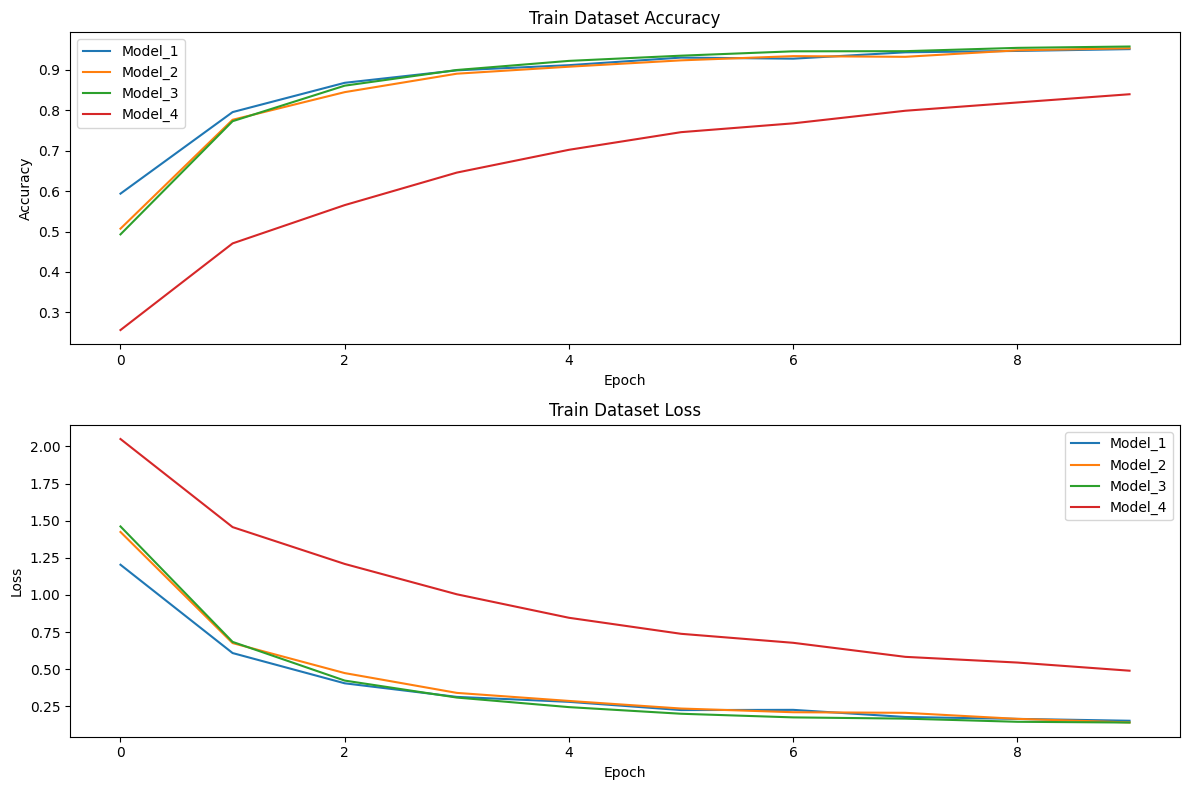

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history_m1.history['accuracy'], label='Model_1')
plt.plot(history_m2.history['accuracy'], label='Model_2')
plt.plot(history_m3.history['accuracy'], label='Model_3')
plt.plot(history_m4.history['accuracy'], label='Model_4')
plt.title('Train Dataset Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history_m1.history['loss'], label='Model_1')
plt.plot(history_m2.history['loss'], label='Model_2')
plt.plot(history_m3.history['loss'], label='Model_3')
plt.plot(history_m4.history['loss'], label='Model_4')
plt.title('Train Dataset Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

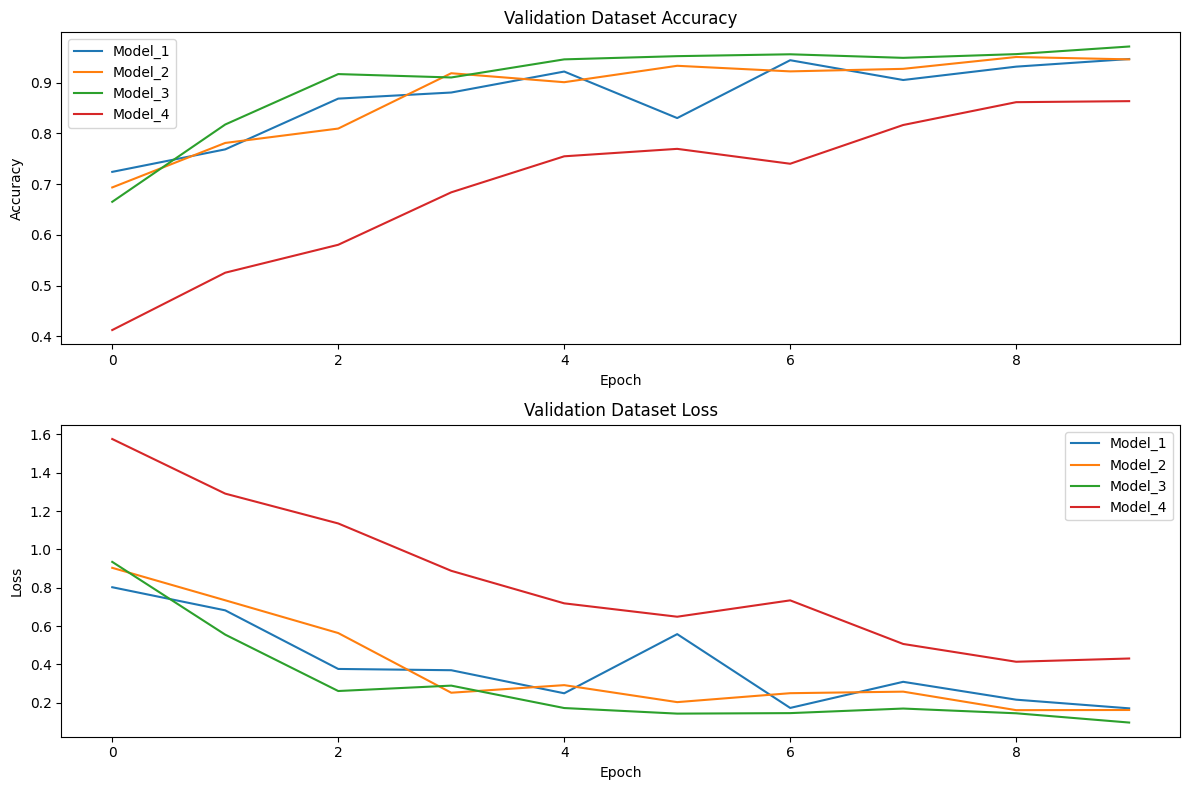

In [37]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history_m1.history['val_accuracy'], label='Model_1')
plt.plot(history_m2.history['val_accuracy'], label='Model_2')
plt.plot(history_m3.history['val_accuracy'], label='Model_3')
plt.plot(history_m4.history['val_accuracy'], label='Model_4')
plt.title('Validation Dataset Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history_m1.history['val_loss'], label='Model_1')
plt.plot(history_m2.history['val_loss'], label='Model_2')
plt.plot(history_m3.history['val_loss'], label='Model_3')
plt.plot(history_m4.history['val_loss'], label='Model_4')
plt.title('Validation Dataset Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#model_1.save_weights('../model_1_v1.h5', save_format='h5')
#model_2.save_weights('../model_2_v1.h5', save_format='h5')
#model_3.save_weights('../model_3_v1.h5', save_format='h5')

### Testing selected model

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = img_to_array(img)
    img_array = img_array / 255.0 
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

image_path = '../data/test//Potato/1179.jpg'
img_array = load_and_preprocess_image(image_path)

In [39]:
predicted = model_3.predict(img_array)
predicted_class = np.argmax(predicted, axis=1)
predicted_probability = np.max(predicted)

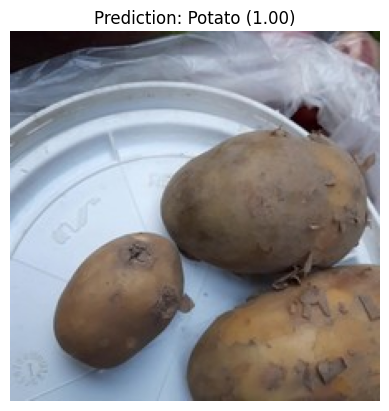

In [40]:
predicted_class_name = class_names[predicted_class[0]]

plt.imshow(img_array[0])
plt.title(f"Prediction: {predicted_class_name} ({predicted_probability:.2f})")
plt.axis("off")
plt.show()

In [41]:
test_images, test_labels = next(iter(test_data.unbatch().batch(len(test_data))))
random_indices = np.random.choice(len(test_images), 10)

selected_images = test_images.numpy()[random_indices]
selected_labels = test_labels.numpy()[random_indices]

In [42]:
predictions = model_3.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_probabilities = np.max(predictions, axis=1)

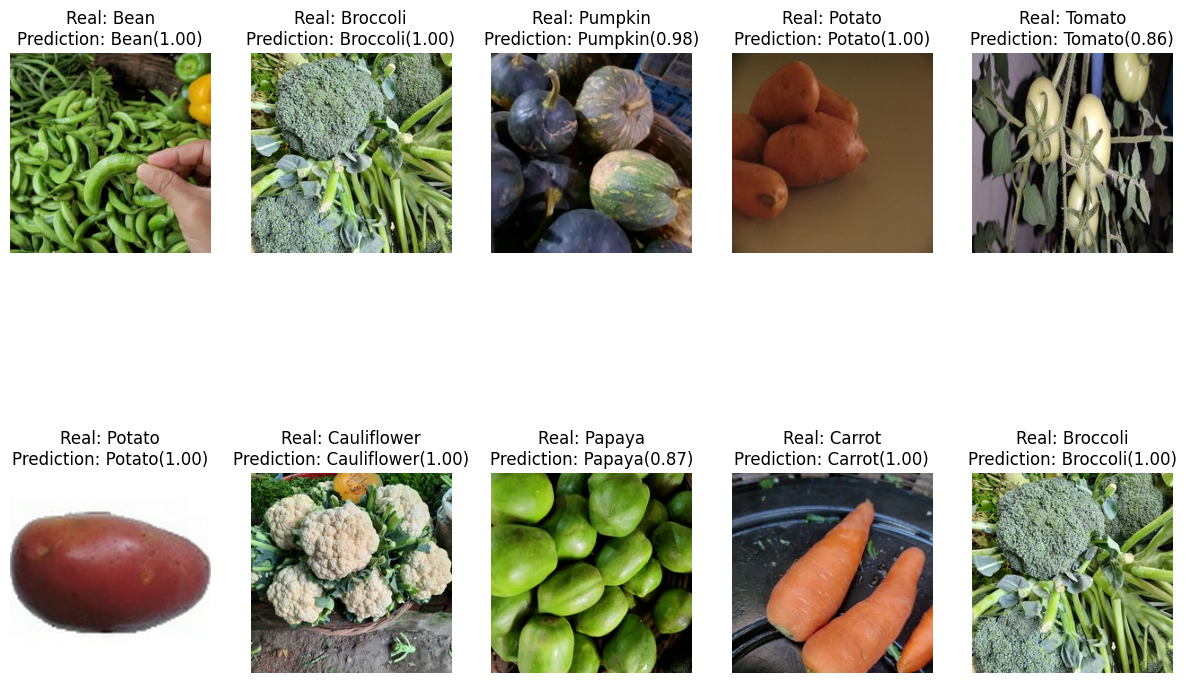

In [43]:
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f"Real: {class_names[selected_labels[i]]}\nPrediction: {class_names[predicted_classes[i]]}({predicted_probabilities[i]:.2f})")
    plt.axis("off")
plt.show()

### Convert Model to TF-Lite

In [44]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_3)

tflite_model = converter.convert()

with open('./models/vegetables-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Vlady\AppData\Local\Temp\tmpa2fv5q3n\assets


In [45]:
os.listdir("./models/")

['best_model_1_01_0.724.h5',
 'best_model_1_02_0.769.h5',
 'best_model_1_03_0.869.h5',
 'best_model_1_04_0.881.h5',
 'best_model_1_05_0.922.h5',
 'best_model_1_07_0.944.h5',
 'best_model_1_10_0.947.h5',
 'best_model_2_01_0.694.h5',
 'best_model_2_02_0.781.h5',
 'best_model_2_03_0.810.h5',
 'best_model_2_04_0.919.h5',
 'best_model_2_06_0.933.h5',
 'best_model_2_09_0.951.h5',
 'best_model_3_01_0.665.h5',
 'best_model_3_02_0.818.h5',
 'best_model_3_03_0.917.h5',
 'best_model_3_05_0.946.h5',
 'best_model_3_06_0.952.h5',
 'best_model_3_07_0.956.h5',
 'best_model_3_09_0.956.h5',
 'best_model_3_10_0.971.h5',
 'best_model_4_01_0.413.h5',
 'best_model_4_02_0.526.h5',
 'best_model_4_03_0.581.h5',
 'best_model_4_04_0.684.h5',
 'best_model_4_05_0.755.h5',
 'best_model_4_06_0.770.h5',
 'best_model_4_08_0.817.h5',
 'best_model_4_09_0.862.h5',
 'best_model_4_10_0.864.h5',
 'vegetables-model.tflite']

In [46]:
import tensorflow.lite as tflite

In [47]:
interpreter = tflite.Interpreter(model_path='./models/vegetables-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [48]:
interpreter.set_tensor(input_index, img_array)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [49]:
classes = [
    'Bean',
    'Bitter_Gourd',
    'Bottle_Gourd',
    'Brinjal',
    'Broccoli',
    'Cabbage',
    'Capsicum',
    'Carrot',
    'Cauliflower',
    'Cucumber',
    'Papaya',
    'Potato',
    'Pumpkin',
    'Radish',
    'Tomato'
]

dict(zip(classes, preds[0]))

{'Bean': 3.842637e-08,
 'Bitter_Gourd': 1.5465733e-10,
 'Bottle_Gourd': 5.605795e-11,
 'Brinjal': 4.1667853e-08,
 'Broccoli': 3.6549013e-06,
 'Cabbage': 1.0592147e-07,
 'Capsicum': 2.0134991e-09,
 'Carrot': 6.154902e-05,
 'Cauliflower': 9.43223e-05,
 'Cucumber': 5.363213e-08,
 'Papaya': 4.5744464e-10,
 'Potato': 0.9980698,
 'Pumpkin': 0.00033797201,
 'Radish': 0.0014318788,
 'Tomato': 5.294912e-07}

Removing TF dependency

In [50]:
def load_and_preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.resize((224, 224), Image.LANCZOS)
    img_array = np.array(img, dtype='float32')
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


image_path = '../data/test//Potato/1179.jpg'
X = load_and_preprocess_image(image_path)

In [51]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [52]:
classes = [
    'Bean',
    'Bitter_Gourd',
    'Bottle_Gourd',
    'Brinjal',
    'Broccoli',
    'Cabbage',
    'Capsicum',
    'Carrot',
    'Cauliflower',
    'Cucumber',
    'Papaya',
    'Potato',
    'Pumpkin',
    'Radish',
    'Tomato'
]

dict(zip(classes, preds[0]))

{'Bean': 3.842637e-08,
 'Bitter_Gourd': 1.5465733e-10,
 'Bottle_Gourd': 5.605795e-11,
 'Brinjal': 4.1667853e-08,
 'Broccoli': 3.6549013e-06,
 'Cabbage': 1.0592147e-07,
 'Capsicum': 2.0134991e-09,
 'Carrot': 6.154902e-05,
 'Cauliflower': 9.43223e-05,
 'Cucumber': 5.363213e-08,
 'Papaya': 4.5744464e-10,
 'Potato': 0.9980698,
 'Pumpkin': 0.00033797201,
 'Radish': 0.0014318788,
 'Tomato': 5.294912e-07}